# Problem Statement

         Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
    Draw the inferences from the clusters obtained.

    Data Description:

    The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

    ID --Unique ID

    Balance--Number of miles eligible for award travel

    Qual_mile--Number of miles counted as qualifying for Topflight status

    cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
    cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
    cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

    1 = under 5,000
    2 = 5,000 - 10,000
    3 = 10,001 - 25,000
    4 = 25,001 - 50,000
    5 = over 50,000

    Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

    Bonus_trans--Number of non-flight bonus transactions in the past 12 months

    Flight_miles_12mo--Number of flight miles in the past 12 months

    Flight_trans_12--Number of flight transactions in the past 12 months

    Days_since_enrolled--Number of days since enrolled in flier program

    Award--whether that person had award flight (free flight) or not

Imported all neccessary libraries .

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Read Dataset

---



In [2]:
dataset = pd.ExcelFile("/content/EastWestAirlines.xlsx")
df = pd.read_excel(dataset,"data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Here we dont need ID# Column so we drop it


In [3]:
df = df.drop("ID#",axis = 1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


Database Handling

---



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [5]:
# checking statistical values
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
# Checking null values
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
# checking duplicates values
df.duplicated().sum()

1

Visualisation of dataset

---



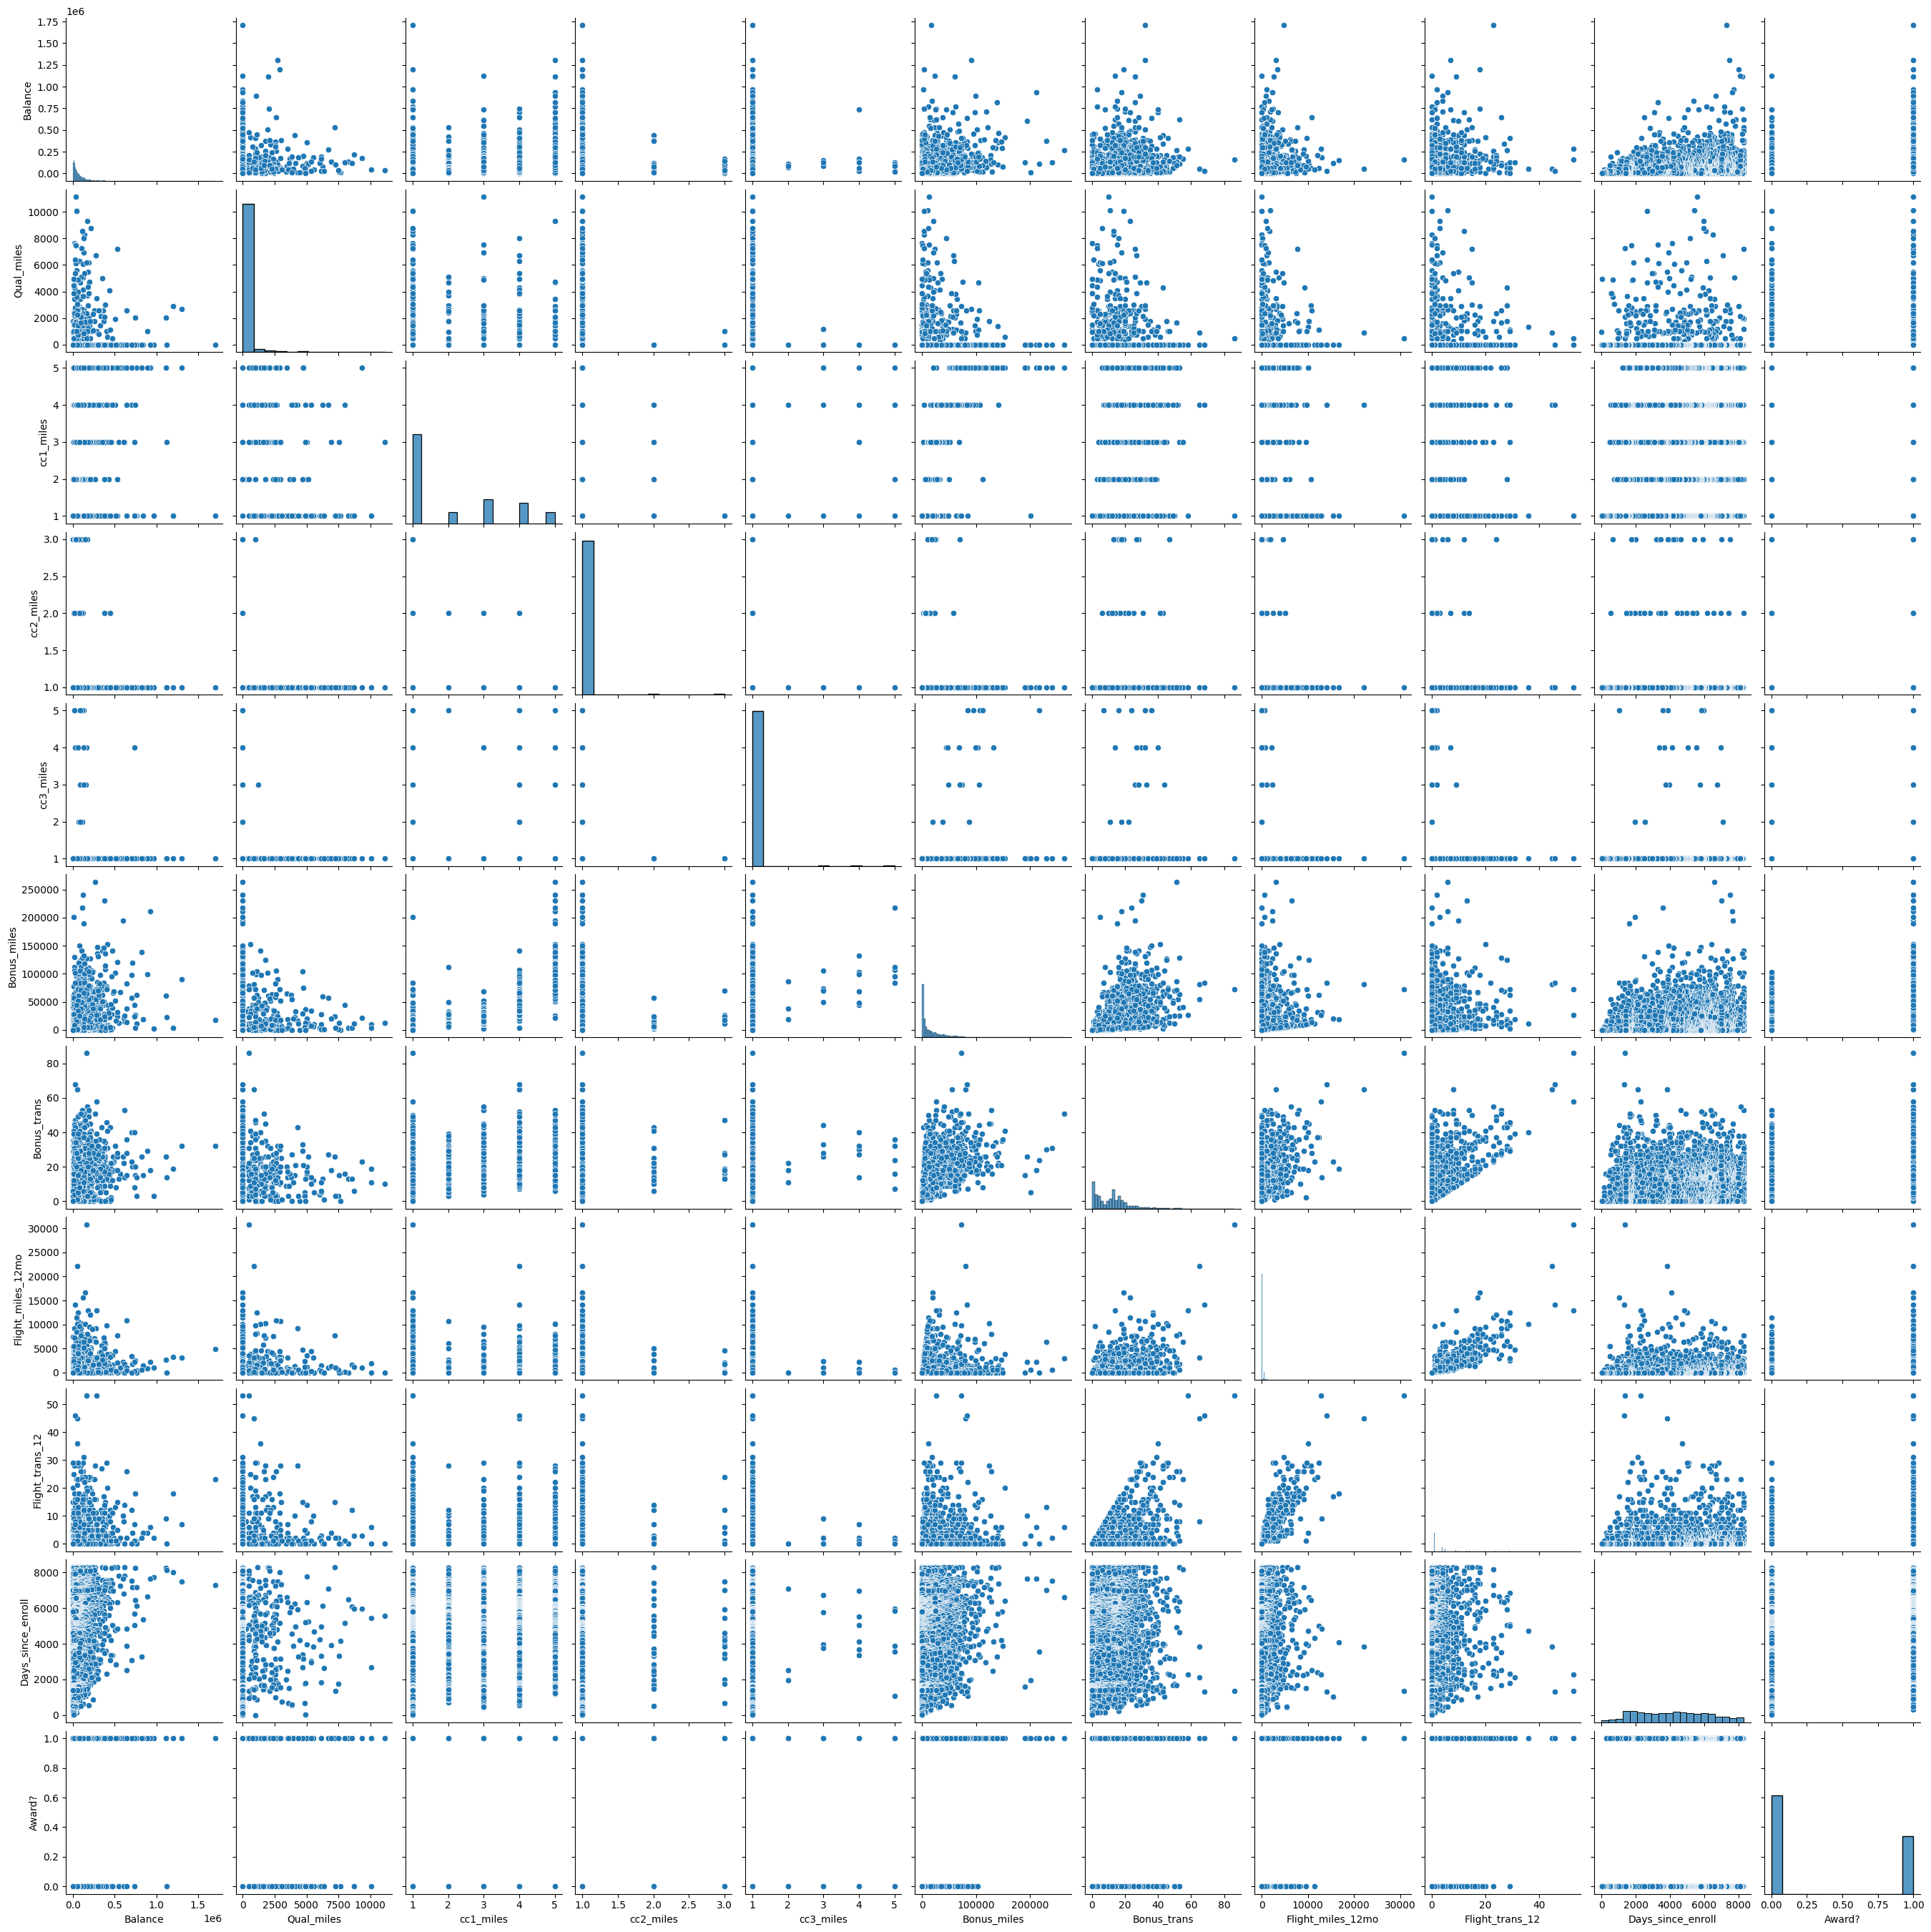

In [8]:
sns.pairplot(df)

Feature scaling

---

Here data is not in correlation shown in pairplot. So we need to normalise the data to make correlation.



In [9]:
from sklearn.preprocessing import normalize

In [10]:
# Create new normalize dataframe df1
df1 = pd.DataFrame(normalize(df),columns=df.columns)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


Visualize normalized dataframe df1

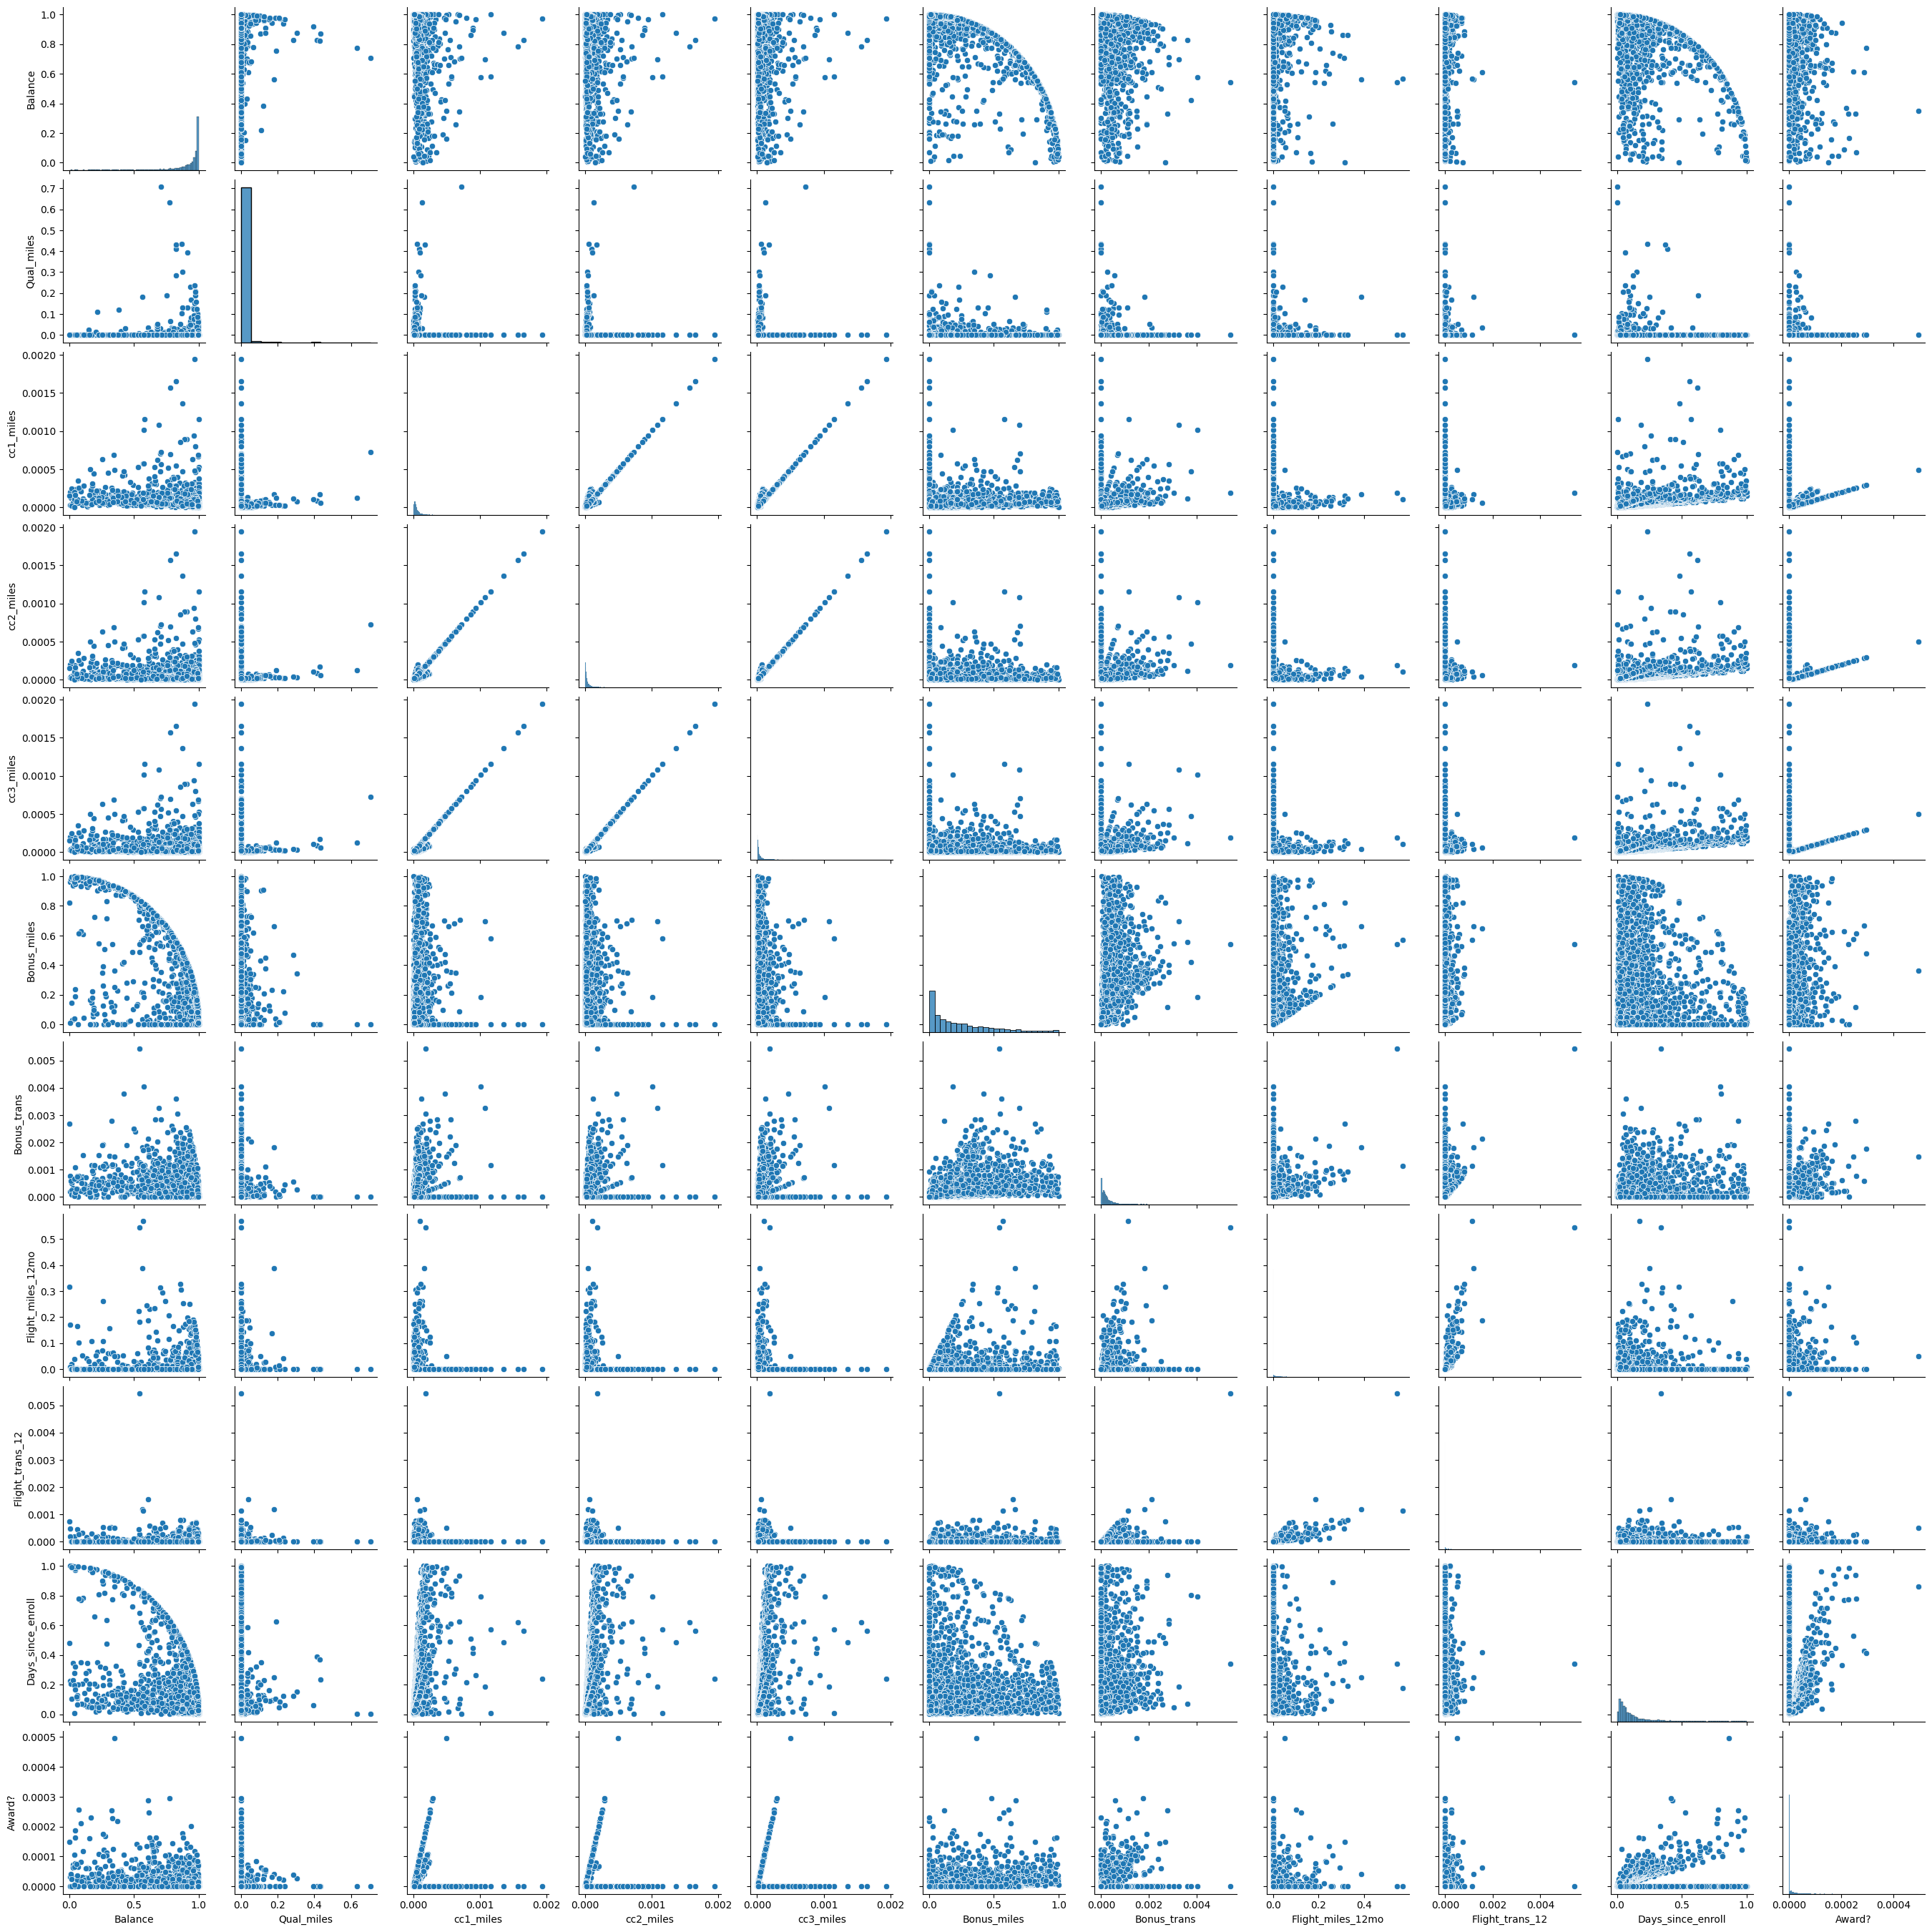

In [11]:
sns.pairplot(df1)

Now data is is normalize form so go for clusterning models


# Hierarchical Clustering

---


In [12]:
from scipy.cluster import hierarchy

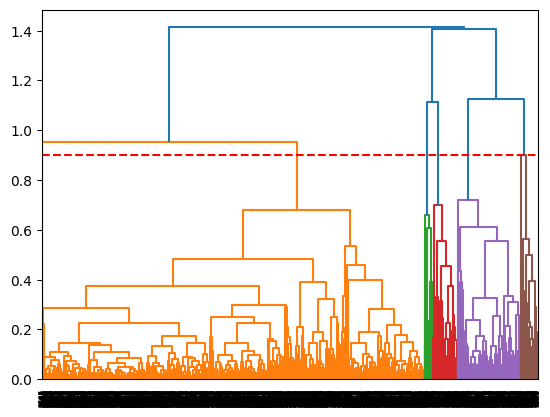

In [13]:

HL = hierarchy.linkage(df1,method= "complete")
dendro = hierarchy.dendrogram(HL)
plt.axhline(y=0.9, c='red', linestyle='--' )

Now we build model for hierarchycal clustering so we use Agglomerative Clustering (Agglomerative is subtype of Hierarchical clustering)

# Hierarchical Model ( Agglomerative)

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
Agglo = AgglomerativeClustering(n_clusters = 5)
y = Agglo.fit_predict(df1)

In [16]:
y

array([4, 2, 2, ..., 2, 4, 2])

Now add Cluster Column In Original Dataset df

In [17]:
df["Cluster"] = y
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


Find all Columns mean with belongs to cluster

In [24]:
df.groupby("Cluster").agg("mean")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


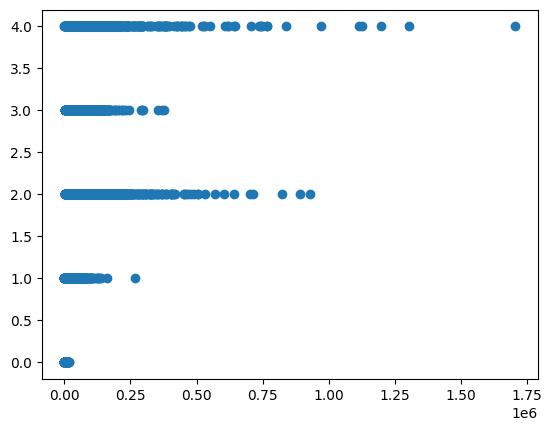

In [27]:
plt.scatter(df["Balance"],df["Cluster"])

# K-MEANS CLUSTERING

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  1.25009890e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -4.30851168e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -4.30851168e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -4.30851168e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.25009890e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -4.30851168e-01]])

In [31]:
df_sc = pd.DataFrame(x,columns = df.columns)
df_sc

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1.250099
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,-0.430851
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,-0.430851
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,-0.430851
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0.409624
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0.409624
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1.250099
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,-0.430851
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,1.250099


In [36]:
km= KMeans()
y = km.fit_predict(x)
y

array([1, 4, 4, ..., 3, 1, 4], dtype=int32)

In [37]:
df1 = pd.DataFrame(x, columns=df.columns)
df1['cluster'] = y
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1.250099,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,-0.430851,4
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,-0.430851,4
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,-0.430851,4
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0.409624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0.409624,3
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1.250099,3
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,-0.430851,3
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,1.250099,1


In [38]:
km.cluster_centers_

array([[ 6.43201102e-01, -1.08245583e-01,  1.53988572e+00,
        -9.82418871e-02, -5.05846025e-02,  1.34450103e+00,
         8.62305453e-01, -4.81607922e-02, -4.89682572e-02,
         4.34990513e-01,  5.11041035e-01, -2.92937310e-01],
       [-1.55555048e-01, -1.32589452e-01, -7.21310788e-01,
        -9.82418871e-02, -6.27665798e-02, -6.22522566e-01,
        -7.69214494e-01, -1.85643181e-01, -1.89500096e-01,
        -3.77493763e-01, -7.35845639e-01,  1.21136318e+00],
       [ 4.25464160e-01,  7.09987688e+00,  9.59681956e-03,
        -9.82418871e-02, -6.27665798e-02,  1.10131291e-01,
         9.82601731e-02,  3.59263109e-01,  4.00062342e-01,
        -8.13235276e-02,  3.24976816e-01,  3.94342502e-01],
       [-1.51407375e-01, -5.89542868e-02, -2.55194846e-01,
        -9.82418871e-02, -6.27665798e-02, -2.63317749e-01,
        -8.46875249e-02, -2.48757036e-02, -1.85748357e-02,
         8.85485811e-02,  1.30391816e+00, -1.13690778e-01],
       [-3.83539901e-01, -1.52804987e-01, -3.5990497

# Elbow Graph

In [39]:
wcss=[]

for i in range (1,21):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [40]:
wcss

[47988.0,
 39296.037267017455,
 34724.58602400393,
 31274.200655292094,
 28261.11320766659,
 24846.894194881865,
 23135.86776785073,
 20760.28463711455,
 19225.895598149124,
 17857.069079674475,
 16849.17268315219,
 16077.97854697947,
 15353.539702346796,
 14607.82622580311,
 14113.796154260317,
 13722.001340904259,
 13233.9134196747,
 12816.126230281272,
 12459.506711451602,
 12118.829908694892]

Text(0.5, 1.0, 'Elbow Curve')

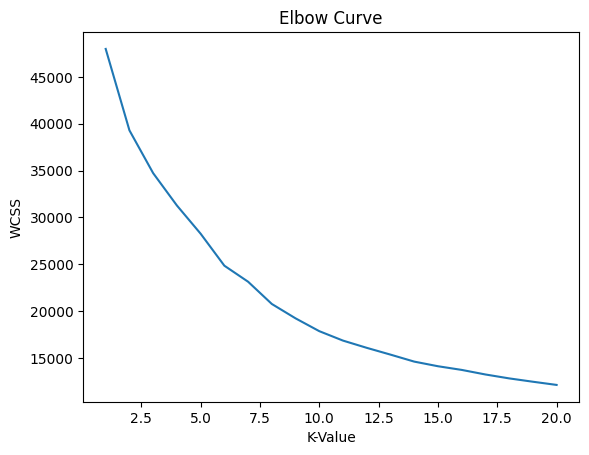

In [41]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

# Final Model

In [42]:
km1= KMeans(n_clusters=5)
y1=km1.fit_predict(x)
y1

array([0, 1, 1, ..., 2, 0, 1], dtype=int32)

In [48]:
df1['Cluster']=y1
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1,4
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1,4
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1,4
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0,3
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0,3
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,2,3
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0,1


In [49]:
df1.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
Cluster,,,,,,,,,,,,
0,-0.072352,0.020564,-0.722263,-0.098242,-0.062767,-0.605519,-0.742972,-0.144811,-0.144691,-0.308756,-0.404158,1.345070
1,-0.415653,-0.112126,-0.431538,0.116793,-0.059514,-0.402909,-0.203582,-0.197958,-0.222551,-0.084996,-0.248881,3.820317
2,0.482583,0.016930,1.304877,-0.086200,-0.053660,1.043706,0.783200,-0.062120,-0.069910,0.386542,0.622843,0.789333
3,1.245574,0.915259,0.113820,0.176364,-0.062767,0.679635,1.742149,3.686989,4.004331,0.311874,0.982099,5.459459
4,0.639719,-0.084433,1.022084,-0.098242,15.646299,3.179691,1.714614,0.033293,0.059695,0.239873,0.337527,5.000000


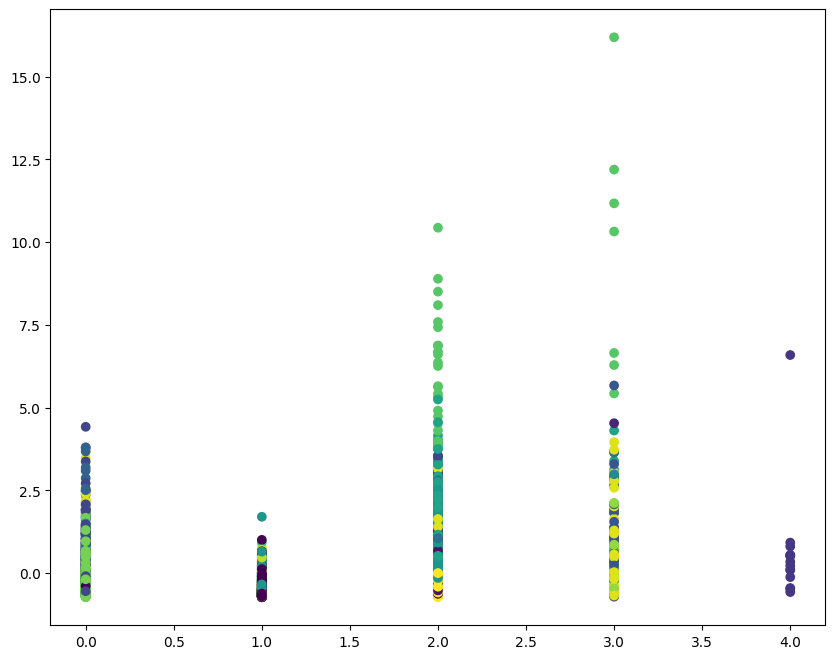

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(df1['Cluster'], df1['Balance'], c=km.labels_)

# Evaluation of K-means

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(x,y)

0.21967099567877335

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

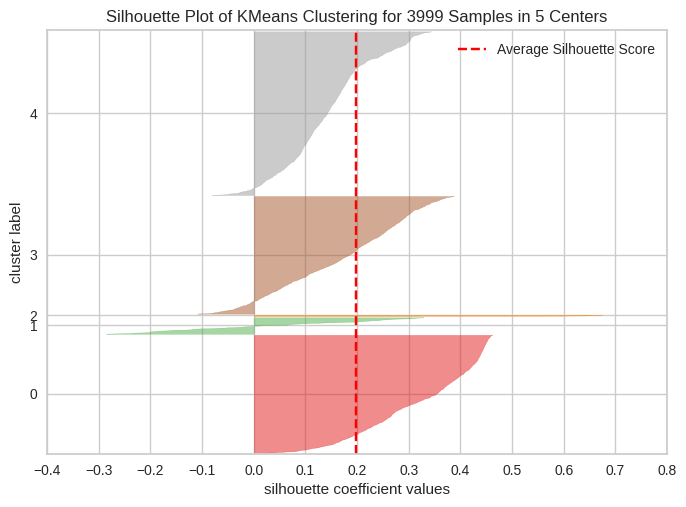

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3999 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
model = KMeans(n_clusters=5)
vis = SilhouetteVisualizer(model)

vis.fit(x)
vis.show()

# DBSCAN

In [53]:
from sklearn.cluster import DBSCAN

In [54]:
db = DBSCAN()
y = db.fit_predict(x)
y

array([ 0,  1,  1, ..., -1,  0,  1])

In [55]:
silhouette_score(x,y)

-0.14890308635404478

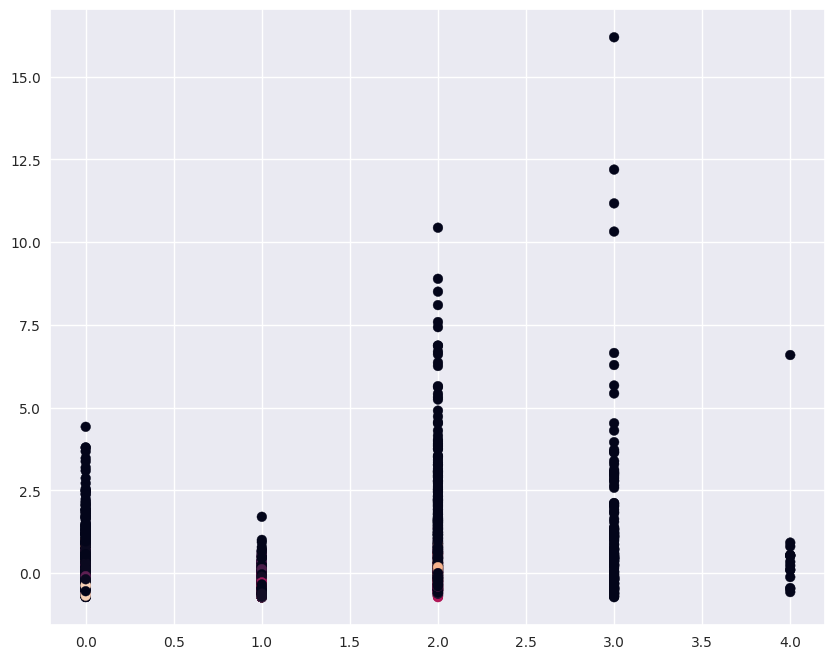

In [59]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
plt.scatter(df1['Cluster'], df1['Balance'],c=db.labels_)